# Imports

In [ ]:
from queue import PriorityQueue as priority_queue
import random
import numpy as np
import pandas as pd
import functools
import time
import seaborn as sb
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import Any
import heapq
sb.set()

## Array implementation of Priority Queue

In [ ]:
class array_prio_q():
    def __init__(self):
        self.array = []
    
    def add_object(self, item, priority):
        temp_tuple = (item, priority)
        self.array.append(temp_tuple)
        self.array.sort(key = lambda x: x[1])

    def del_object(self, item):
        index = 0
        for i in self.array:
            if (i[0] == item):
                self.array.pop(index)
                return
            index += 1
    
    def is_empty(self):
        return not bool(len(self.array))

# Matrix Graph

In [ ]:
class Graph: 

    # Constructor 
    def __init__(self, vertices):
        self.V = vertices # number of vertices 
        self.graph = [[float('inf') for column in range(vertices + 1)] for row in range(vertices + 1)] # creates the matrix  # 0,0 is offset node 0 is offset
        self.pi = []
        self.edge = 0

    # Method to add edges 
    def add_edge(self, u, v, dist):
        self.graph[u][v] = dist
        self.edge += 1

    # Shortest path algo
    def dijkstra_shortest_path(self, start = 1, print = True):
        start_time = time.perf_counter()
        dist = [float('inf')] * (self.V + 1)
        pi = [None] * (self.V + 1)
        Set = [False] * (self.V + 1) 
        
        dist[start] = 0
        pq = array_prio_q()

        # put everything into a pq 
        for i in range(1, self.V + 1):
            pq.add_object(i, self.graph[i][0])    

        while not pq.is_empty():

            current_tuple = pq.array[0]
            pq.del_object(pq.array[0][0])        
            u = current_tuple[0]
            Set[u] = True 
            

            for neighbour in range(1, self.V + 1):
                # If it is a neighbour
                # and not yet visited 
                if (self.graph[u][neighbour] > 0 and Set[neighbour] == False and dist[neighbour] > dist[u] + self.graph[u][neighbour]):
                    pq.del_object(neighbour)
                    dist[neighbour] = dist[u] + self.graph[u][neighbour]
                    pi[neighbour] = u
                    pq.add_object(neighbour, dist[neighbour])
                

        end = time.perf_counter()
        time_taken = end - start_time
        self.pi = pi
        if print:
            self.printSolution(dist)

        return dist, time_taken

    def printSolution(self, dist):

        print(f"Matrix graph, with {self.V} vertices and {self.edge} edges")
        print ("Vertex\t\t\t\tDistance from First Node\t\tPrevious Index")
        for node in range(1, self.V+1):
            print(f"{node}\t\t\t\t{dist[node]}\t\t{self.pi[node]}")
        print()



## Linked List Implementation

In [ ]:
class node:
    def __init__(self, data_value = None, weight = 0, index = None, next_node = None):
        self.data_value = data_value # value
        self.index = index # for indexing in linked list
        self.weight = weight # for weighted graphs
        self.next_node = next_node # to point to next node

class linked_list:
    def __init__(self):
        self.size = 0
        self.head = None
        self.tail = None
    
    def append(self, number):
        temp = node(data_value = number, index = self.size) # insert at the end, so insert at size
        if (self.head == None): # first node
            self.head = temp 
            self.tail = self.head
        else:
            self.tail.next_node = temp
            self.tail = self.tail.next_node
        self.size += 1

    def print_list(self):
        temp = self.head
        while (temp != None): # traverse down the list
            print(f"{temp.data_value}", end = "")
            if (temp.weight != 0): # for graph printing
                print(f"/W:{temp.weight}", end = "")
            print(" -> ", end = "")
            temp = temp.next_node
        print("")

    def contains(self, value): # checks if a value exists in a list
        temp = self.head;
        while temp:
            if temp.data_value == value:
                return True
            else:
                temp = temp.next_node

        return False

    def find_index(self, value): # get index of a value in a list
        if (self.contains(value)):
            temp = self.head
            while temp:
                if (temp.data_value == value):
                    return temp.index
                else:
                    temp = temp.next_node

    def node_at(self, index): # get node at index in a list
        if (index >= self.size):
            print("No such node")
            return None

        temp = self.head;
        while (temp.index != index):
            temp = temp.next_node

        return temp


    def remove_at(self, index): # remove node at certain index
        if (index >= self.size): # too lazy to deal with removing head node
            print("No such node")
            return
        elif (index == 0):
            self.dequeue()
            return
        
        temp = self.node_at(index-1)
        temp.next_node = self.node_at(index).next_node
        self.size -= 1
    
    def pop(self):
        self.remove_at(self.size - 1)
    
    def dequeue(self):
        self.head = self.head.next_node

## Min Heap Implementation

In [ ]:
class min_heap_pq:
    def __init__(self):
        first_element = node(None, float('inf'),0) # data_value, priority, index
        self.max_size = 1000
        self.array = [first_element] * self.max_size
        self.size = 0
        self.dict = {} # node.data_value : index
        
    
    def get_parent(self, curr_index):
        return curr_index // 2
    
    def has_parent(self, curr_index):
        return self.get_parent(curr_index) >= 1

    def get_left(self, curr_index):
        return curr_index * 2

    def has_left(self, curr_index):
        return self.get_left(curr_index) <= self.size

    def get_right(self, curr_index):
        return (curr_index * 2) + 1
    
    def has_right(self, curr_index):
        return self.get_right(curr_index) <= self.size
    
    def check_is_leaf(self, curr_index):
        if (curr_index >= self.size//2 and curr_index <= self.size):
            return True
        return False

    def prio_of(self, curr_index):
        return self.array[curr_index].weight

    def swap(self, first_index, second_index):
        first_node = self.array[first_index]
        second_node = self.array[second_index]
        # swap in the heap itself
        self.array[first_index], self.array[second_index] = self.array[second_index], self.array[first_index]

        # update index dict
        self.dict[first_node.data_value], self.dict[second_node.data_value] = self.dict[second_node.data_value], self.dict[first_node.data_value]

        # update the nodes' index attribute
        self.array[first_index].index, self.array[second_index].index = self.array[second_index].index, self.array[first_index].index

    def heapify_down(self):
        curr_index = 1
        while (self.has_left(curr_index)):
            smaller_index = self.get_left(curr_index)

            if (self.has_right(curr_index) and self.prio_of(self.get_right(curr_index)) < self.prio_of(self.get_left(curr_index))):
                smaller_index = self.get_right(curr_index)

            if (self.prio_of(curr_index) < self.prio_of(smaller_index)):
                break
            else:
                self.swap(curr_index, smaller_index)
            
            curr_index = smaller_index
    
    def heapify_up(self):
        curr_index = self.size
        while (self.has_parent(curr_index) and self.prio_of(self.get_parent(curr_index)) > self.prio_of(curr_index)):
            self.swap(self.get_parent(curr_index), curr_index)
            curr_index = self.get_parent(curr_index)

    def add_object(self, data_value, priority):
        self.size += 1
        index = self.size
        temp_node = node(data_value, priority, index)
        self.array[index] = temp_node
        self.dict[data_value] = index

        self.heapify_up()
        
    def get_min(self):
        to_return = self.array[1]
        self.swap(1, self.size)
        self.size -= 1
        self.heapify_down()
        return to_return

    def get_specific(self, data_value):
        index = self.dict[data_value]
        to_return = self.array[index]
        self.swap(index, self.size)
        self.size -= 1
        self.heapify_down()
        # self.heapify_up()
        return to_return
    
    def is_empty(self):
        return not self.size

# Linked List Graph

In [ ]:
class list_graph:
    def __init__(self, vertices = 0):
        self.vertices = vertices
        self.edges = 0
        temp = [None]
        for i in range(1, vertices+1):
            temp_list = linked_list()
            temp_list.append(i)
            temp.append(temp_list)
        self.list = temp
    
    def add_edge(self, vertex_one, vertex_two, weight = 1):
        flag = False
        if (not self.list[vertex_one].contains(vertex_two)): # is there already an edge from one to two
            flag = True
            self.list[vertex_one].append(vertex_two) # add two to linked list
            self.list[vertex_one].node_at(self.list[vertex_one].size - 1).weight = weight # get node of two in one's linked list. set weight to weight. (one/weight = 0) -> (two/weight = weight)

        if (flag):
            self.edges += 1
        else: # update weights
            index = self.list[vertex_one].find_index(vertex_two)
            self.list[vertex_one].node_at(index).weight = weight

    def print_graph(self):
        for i in range(1, self.vertices + 1):
            self.list[i].print_list()



    def dijkstra(self, source = 1, print = True):
        start = time.perf_counter()
        known_distance = [float('inf')] * (self.vertices + 1)
        previous_node = [None] * (self.vertices + 1)
        visited = [0] * (self.vertices + 1)

        known_distance[source] = 0
        prio_queueueue = min_heap_pq()
        for i in range(1, self.vertices + 1):
            prio_queueueue.add_object(i, known_distance[i])

        while not prio_queueueue.is_empty():
            current_node = prio_queueueue.get_min()
            current_vertex = current_node.data_value
            visited[current_vertex] = 1

            current_node = self.list[current_vertex].head.next_node
            while (current_node != None):
                adjacent = current_node.data_value
                bool_one = visited[adjacent] != 1
                bool_two = known_distance[adjacent] > known_distance[current_vertex] + current_node.weight

                if (bool_one and bool_two):
                    temp = prio_queueueue.get_specific(adjacent)
                    known_distance[adjacent] = known_distance[current_vertex] + current_node.weight
                    previous_node[adjacent] = current_vertex
                    prio_queueueue.add_object(adjacent, known_distance[adjacent])
                current_node = current_node.next_node
        end = time.perf_counter()
        time_taken = end - start
                
        if print:
            self.print_solution(known_distance, previous_node)

        return known_distance, time_taken

    def print_solution(self, distance, previous):

        print(f"Linked List implementation of graph, with {self.vertices} vertices and {self.edges} edges")
        print("Vertex\t\t\t\tDistance from Source Node\t\tPrevious Index")
        for i in range(1, self.vertices + 1):
            print(f"{i}\t\t\t\t{distance[i]}\t\t{previous[i]}")

        print()
        return

# Testing of Both Algorithms

In [ ]:
test_graph = list_graph(5)
test_graph.add_edge(1, 2, 4)
test_graph.add_edge(1, 3, 2)
test_graph.add_edge(1, 4, 6)
test_graph.add_edge(1, 5, 8)
test_graph.add_edge(2, 4, 4)
test_graph.add_edge(2, 5, 3)
test_graph.add_edge(3, 4, 1)
test_graph.add_edge(4, 2, 1)
test_graph.add_edge(4, 5, 3)

g = Graph(5)
g.add_edge(1, 2, 4)
g.add_edge(1, 3, 2)
g.add_edge(1, 4, 6)
g.add_edge(1, 5, 8)
g.add_edge(2, 4, 4)
g.add_edge(2, 5, 3)
g.add_edge(3, 4, 1)
g.add_edge(4, 2, 1)
g.add_edge(4, 5, 3)


In [ ]:
list_dist, list_time = test_graph.dijkstra()
matr_dist, matrix_and_array_pq = g.dijkstra_shortest_path()

if (list_dist == matr_dist):
    print(f"Linked List: {list_time:6f} seconds")
    print(f"Matrix: {matrix_and_array_pq:6f} seconds")

Linked List implementation of graph, with 5 vertices and 9 edges
Vertex				Distance from Source Node		Previous Index
1				0		None
2				4		1
3				2		1
4				3		3
5				6		4

Matrix graph, with 5 vertices and 9 edges
Vertex				Distance from First Node		Previous Index
1				0		None
2				4		1
3				2		1
4				3		3
5				6		4

Linked List: 0.000128 seconds
Matrix: 0.000815 seconds


# Analysis

## Test case generators

In [ ]:
def iterate_test_case(lower, upper, step):
    i = 0
    test_dictionary = {}

    for vertices in range(lower, upper, step):
        matr_test = Graph(vertices)
        link_test = list_graph(vertices)

        for j in range(1, vertices + 1):
            for k in range(1, vertices + 1):
                if (j != k):
                    weight = random.randint(-vertices, vertices) # increase chance of not adding a new edge

                    if (weight > 0):
                        matr_test.add_edge(j, k , weight)
                        link_test.add_edge(j, k , weight)
                        
        test_dictionary[i] = [matr_test, link_test]
        i += 1
    return test_dictionary


In [ ]:
def random_test_case(lower, upper):
    i = 0
    test_dictionary = {}
    step = random.randint(1, (int)(upper/(random.randint(lower, upper/2))))
    for vertices in range(lower, upper, step):
        matr_test = Graph(vertices)
        link_test = list_graph(vertices)
        for j in range(random.randint(lower, upper)):
            l = random.randint(1, vertices)
            k = random.randint(1, vertices)
        
            if (j != k):
                weight = random.randint(0, random.randint(0, vertices))
                if (weight != 0):
                    matr_test.add_edge(k, l, weight)
                    link_test.add_edge(k, l, weight)
        test_dictionary[i] = [matr_test, link_test]
        i += 1
    return test_dictionary

In [ ]:
def run_test(test_dictionary, printing = True):
    result_dictionary = {}
    for key, value in test_dictionary.items():
        matr_test = value[0]
        link_test = value[1]

        matr_dist, matrix_and_array_pq = matr_test.dijkstra_shortest_path(print = False)
        link_dist, list_and_minheap_pq = link_test.dijkstra(print = False)
        time_diff = abs(matrix_and_array_pq - list_and_minheap_pq)

        results = {}
        results["vertices"] = link_test.vertices
        results["edges"] = link_test.edges
        results["matrix_and_array_pq"] = matrix_and_array_pq
        results["list_and_minheap_pq"] = list_and_minheap_pq
        results["time_diff"] = time_diff
        results["link faster"] = False
        results["matrix faster"] = False
        if printing:
            print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            print(f"Test number {key}")

        if (matr_dist == link_dist):
            if (matrix_and_array_pq < list_and_minheap_pq):
                results["matrix faster"] = True
                if printing:
                    print(f"Matrix is faster by {time_diff:6f} seconds")
            else:
                results["link faster"] = True
                if printing:
                    print(f"Linked List is faster by {time_diff:6f} seconds")

        result_dictionary[key] = results

    return pd.DataFrame.from_dict(result_dictionary, orient = "index")

## Creating the test cases

In [ ]:
iter_test_0 = iterate_test_case(10, 500, 10)
iter_results_0 = run_test(iter_test_0, printing = False)
iter_results_0

,vertices,edges,matrix_and_array_pq,list_and_minheap_pq,time_diff,link faster,matrix faster
0,10,44,0.000121,0.000272,0.000151,False,True
1,20,177,0.000307,0.000645,0.000338,False,True
2,30,408,0.000616,0.001006,0.000390,False,True
3,40,763,0.001126,0.002176,0.001049,False,True
4,50,1192,0.001950,0.002450,0.000500,False,True
5,60,1763,0.002772,0.003091,0.000319,False,False
6,70,2426,0.003874,0.003669,0.000206,False,False
7,80,3103,0.005433,0.004706,0.000727,False,False
8,90,3927,0.006388,0.005067,0.001320,False,False
9,100,4890,0.008174,0.005976,0.002198,False,False


In [ ]:
iter_test_1 = iterate_test_case(1, 300, 2)
iter_results_1 = run_test(iter_test_1, False)
iter_results_1

,vertices,edges,matrix_and_array_pq,list_and_minheap_pq,time_diff,link faster,matrix faster
0,1,0,0.000036,0.000040,0.000004,False,True
1,3,4,0.000024,0.000044,0.000020,False,True
2,5,12,0.000032,0.000083,0.000050,False,True
3,7,20,0.000053,0.000117,0.000064,False,True
4,9,37,0.000085,0.000189,0.000104,False,True
...,...,...,...,...,...,...,...
145,291,42113,0.081436,0.032066,0.049370,False,False
146,293,42665,0.082364,0.031928,0.050436,False,False
147,295,43212,0.081565,0.036054,0.045511,False,False
148,297,43999,0.081278,0.034965,0.046313,False,False


In [ ]:
random_test_0 = random_test_case(1, 300)
random_results_0 = run_test(random_test_0, False)
random_results_0

,vertices,edges,matrix_and_array_pq,list_and_minheap_pq,time_diff,link faster,matrix faster
0,1,0,0.000031,0.000035,0.000005,False,True
1,3,0,0.000017,0.000027,0.000010,False,True
2,5,13,0.000031,0.000080,0.000049,False,True
3,7,42,0.000053,0.000151,0.000098,False,True
4,9,54,0.000075,0.000233,0.000158,False,True
...,...,...,...,...,...,...,...
145,291,176,0.026866,0.008714,0.018153,True,False
146,293,242,0.026174,0.006772,0.019402,True,False
147,295,289,0.027051,0.007708,0.019342,True,False
148,297,260,0.026141,0.007681,0.018460,True,False


### Time against Vertices (Individually)

In [ ]:
random_test_1 = random_test_case(5, 500)
random_results_1 = run_test(random_test_1, False)
random_results_1

,vertices,edges,matrix_and_array_pq,list_and_minheap_pq,time_diff,link faster,matrix faster
0,5,20,0.000072,0.000116,0.000044,False,True
1,9,16,0.000083,0.000154,0.000071,False,True
2,13,137,0.000135,0.000386,0.000251,False,True
3,17,149,0.000228,0.000494,0.000267,False,True
4,21,178,0.000302,0.000613,0.000311,False,True
...,...,...,...,...,...,...,...
119,481,446,0.069621,0.012668,0.056953,True,False
120,485,390,0.066885,0.012501,0.054385,True,False
121,489,218,0.078518,0.012197,0.066320,True,False
122,493,361,0.068108,0.013052,0.055057,True,False


### Line Plots of Time against Vertices (iterative test)

Text(0, 0.5, 'Time')

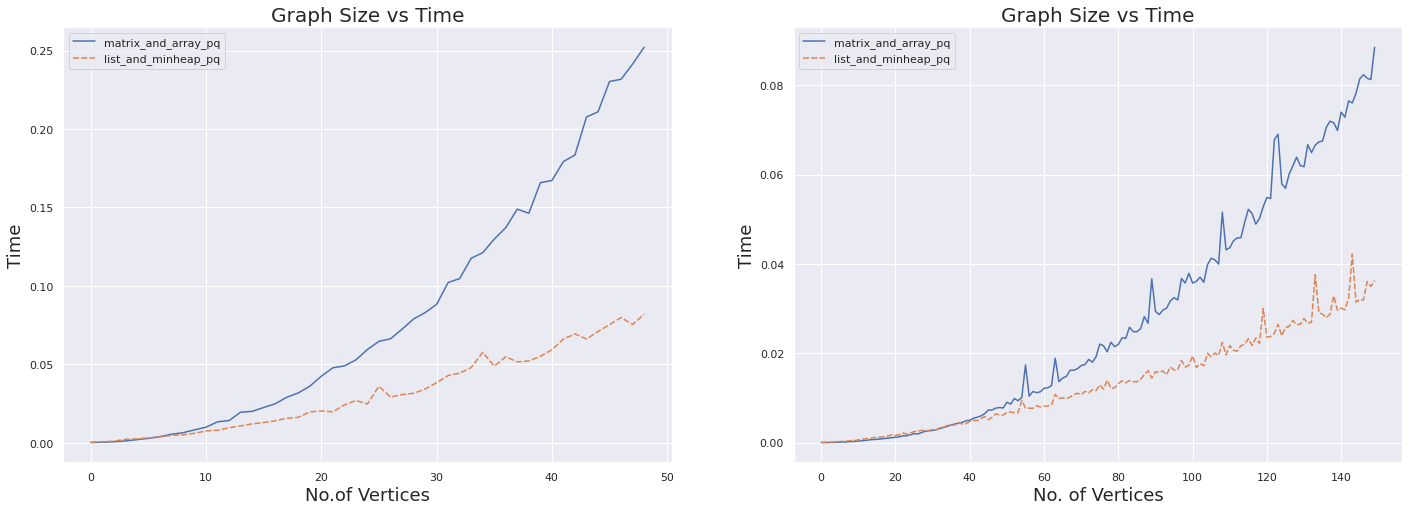

In [ ]:
data_to_plot_0 = pd.DataFrame(iter_results_0[["matrix_and_array_pq", "list_and_minheap_pq"]])
data_to_plot_1 = pd.DataFrame(iter_results_1[["matrix_and_array_pq", "list_and_minheap_pq"]])
data_to_plot_2 = pd.DataFrame(random_results_0[["matrix_and_array_pq", "list_and_minheap_pq"]])
data_to_plot_3 = pd.DataFrame(random_results_1[["matrix_and_array_pq", "list_and_minheap_pq"]])


fig, ax = plt.subplots(1,2, figsize = (24, 8))

p1 = sb.lineplot(data = data_to_plot_0, ax = ax[0])
p1.set_title("Graph Size vs Time", size = 20)
p1.set_xlabel("No.of Vertices", fontsize = 18)
p1.set_ylabel("Time", fontsize = 18)
plt.legend(["matrix and array pq", "list and minheap pq"])

p2 = sb.lineplot(data = data_to_plot_1, ax = ax[1])
p2.set_title("Graph Size vs Time", size = 20)
p2.set_xlabel("No. of Vertices", fontsize = 18)
p2.set_ylabel("Time", fontsize = 18)

Text(0, 0.5, 'Time')

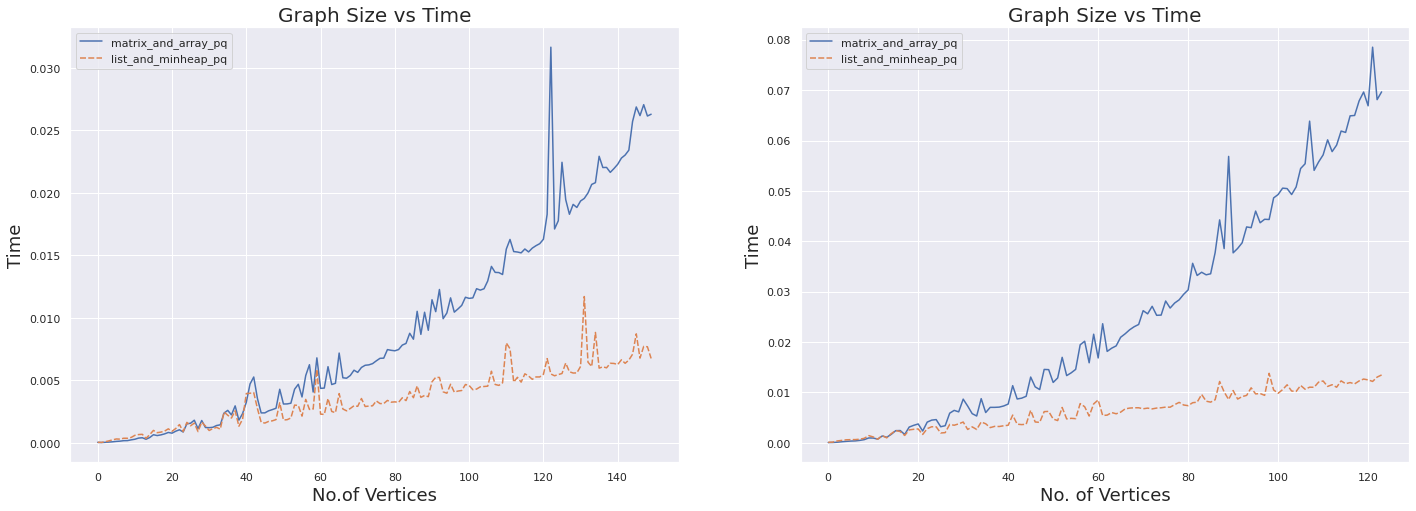

In [ ]:
# random generated test
fig, ax = plt.subplots(1,2, figsize = (24, 8))
p3 = sb.lineplot(data = data_to_plot_2, ax = ax[0])
p3.set_title("Graph Size vs Time", size = 20)
p3.set_xlabel("No.of Vertices", fontsize = 18)
p3.set_ylabel("Time", fontsize = 18)

p4 = sb.lineplot(data = data_to_plot_3, ax = ax[1])
p4.set_title("Graph Size vs Time", size = 20)
p4.set_xlabel("No. of Vertices", fontsize = 18)
p4.set_ylabel("Time", fontsize = 18)


<BarContainer object of 150 artists>

<Figure size 4000x4000 with 0 Axes>

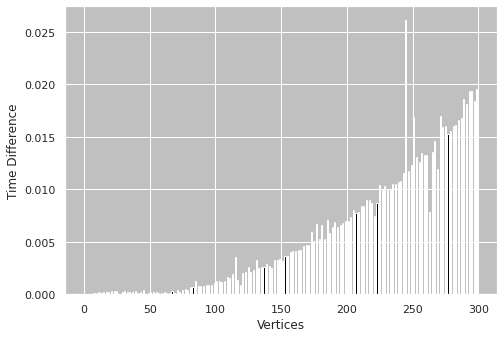

In [ ]:
fig = plt.figure(figsize=(20,20), dpi = 200)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor('silver')
plt.xlabel("Vertices")
plt.ylabel("Time Difference")
ax.bar(random_results_0["vertices"], random_results_0["time_diff"], color = "black")

<BarContainer object of 124 artists>

<Figure size 6000x6000 with 0 Axes>

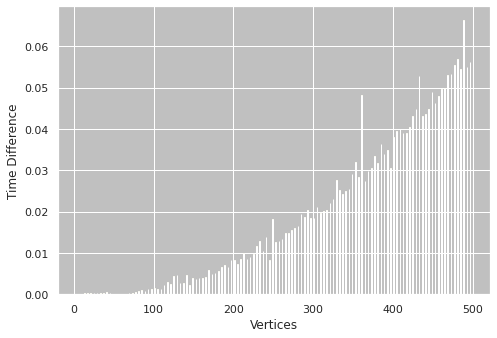

In [ ]:
fig = plt.figure(figsize=(20,20), dpi = 300)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor('silver')
plt.xlabel("Vertices")
plt.ylabel("Time Difference")
ax.bar(random_results_1["vertices"], random_results_1["time_diff"], color = "yellow")

<BarContainer object of 49 artists>

<Figure size 6000x6000 with 0 Axes>

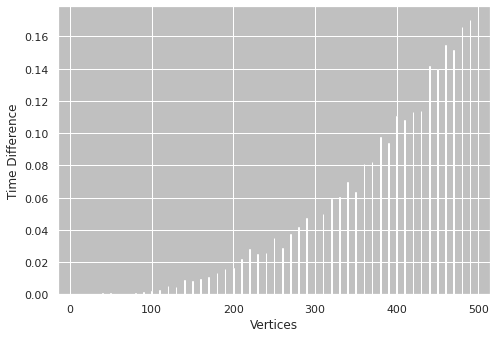

In [ ]:
fig = plt.figure(figsize=(20,20), dpi = 300)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor('silver')
plt.xlabel("Vertices")
plt.ylabel("Time Difference")
ax.bar(iter_results_0["vertices"], iter_results_0["time_diff"], color = "black")

<BarContainer object of 150 artists>

<Figure size 6000x6000 with 0 Axes>

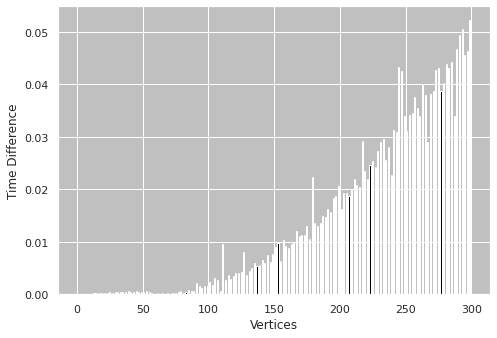

In [ ]:
fig = plt.figure(figsize=(20,20), dpi = 300)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_facecolor('silver')
plt.xlabel("Vertices")
plt.ylabel("Time Difference")
ax.bar(iter_results_1["vertices"], iter_results_1["time_diff"], color = "black")

In [ ]:
clrs_0 = ['black' if (x == "Link Faster") else 'red' for x in barplot_0["Faster"]]
clrs_1 = ['black' if (x == "Link Faster") else 'red' for x in barplot_1["Faster"]]

fig, ax = plt.subplots(1, 2, figsize = (36, 12), dpi = 300)
b1 = sb.barplot(data = barplot_0, x = "vertices", y = "time_diff", palette = clrs_0, hue = barplot_0["Faster"], ax = ax[0])
b1.set_facecolor("silver")
b1.set_title("Iterative Test 0 (500 Test Cases)", fontsize = 20)
b1.set(ylabel = "Time Difference", xlabel = "Vertices", xticks = ([]))

b2 = sb.barplot(data = barplot_1, x = "vertices", y = "time_diff", palette = clrs_1, hue = barplot_1["Faster"], ax = ax[1])
b2.set_facecolor("silver")
b2.set_title("Iterative Test 1 (300 Test Cases)", fontsize = 20)
b2.set(ylabel = "Time Difference", xlabel = "Vertices", xticks = ([]))

NameError: ignored

In [ ]:
clrs_2 = ['blue' if (x == "Link Faster") else 'red' for x in barplot_2["Faster"]]
clrs_3 = ['blue' if (x == "Link Faster") else 'red' for x in barplot_3["Faster"]]

fig, ax = plt.subplots(1, 2, figsize = (36, 12))
b3 = sb.barplot(data = barplot_2, x = "vertices", y = "time_diff", palette = clrs_2, hue = barplot_2["Faster"], ax = ax[0])
b3.set_title("Iterative Test 0 (500 Test Cases)", fontsize = 20)
b3.set(xlabel = "Time Difference", ylabel = "Vertices", xticks = ([]))

b4 = sb.barplot(data = barplot_3, x = "vertices", y = "time_diff", palette = clrs_3, hue = barplot_3["Faster"], ax = ax[1])
b4.set_title("Iterative Test 1 (300 Test Cases)", fontsize = 20)
b4.set(xlabel = "Time Difference", ylabel = "Vertices", xticks = ([]))